# Week 4 Notebook - Linear Regression, Linear Discriminant, Logistic Regression

## Basis Functions

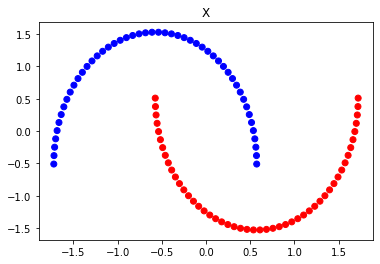

<ipython-input-5-ae4f10c7e1fa>:17: RuntimeWarning: invalid value encountered in log
  X1 = np.log(X[:,0])


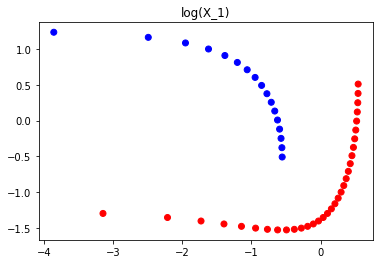

<ipython-input-5-ae4f10c7e1fa>:22: RuntimeWarning: invalid value encountered in log
  X1 = np.log(X[:,0])


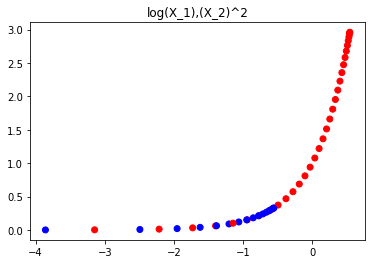

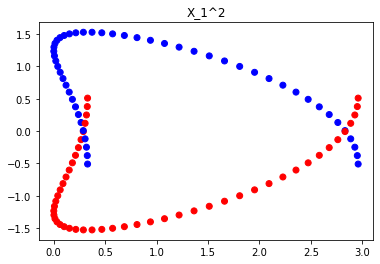

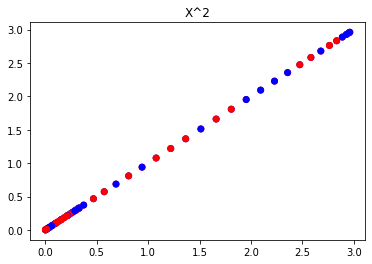

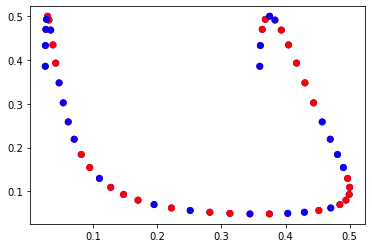

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
from sklearn import preprocessing

X, y = make_moons(n_samples=100)
#X, y = make_blobs(n_samples=100)


X = preprocessing.StandardScaler().fit_transform(X)

plt.title('X')
plt.scatter(X[:,0],X[:,1], c=y, alpha=1, cmap=plt.cm.bwr)
plt.show()

X1 = np.log(X[:,0])
plt.title('log(X_1)')
plt.scatter(X1,X[:,1], c=y, alpha=1, cmap=plt.cm.bwr)
plt.show()

X1 = np.log(X[:,0])
X2 = np.square(X[:,0])
plt.title('log(X_1),(X_2)^2')
plt.scatter(X1,X2, c=y, alpha=1, cmap=plt.cm.bwr)
plt.show()

X1 = np.square(X[:,0])
plt.title('X_1^2')
plt.scatter(X1,X[:,1], c=y, alpha=1, cmap=plt.cm.bwr)
plt.show()

X2 = np.square(X[:,0])
plt.title('X^2')
plt.scatter(X1,X2, c=y, alpha=1, cmap=plt.cm.bwr)
plt.show()

X1_mm = np.exp(-((X[:,0] - X[:,0].mean()))**2)/2
X2_mm = np.exp(-((X[:,1] - X[:,1].mean()))**2)/2
X2 = np.square(X[:,0])
plt.scatter(X1_mm,X2_mm, c=y, alpha=1, cmap=plt.cm.bwr)
plt.show()

## Manifold Learning

Sources for this code are Rashcka <a href="http://sebastianraschka.com/Articles/2014_kernel_pca.html">Kernel tricks and nonlinear dimensionality reduction via RBF kernel PCA</a> and Jake Vanderplas <a href="http://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html">sklearn: Comparison of Manifold Learning methods</a>

<ipython-input-18-2ba6dae8ef9a>:19: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


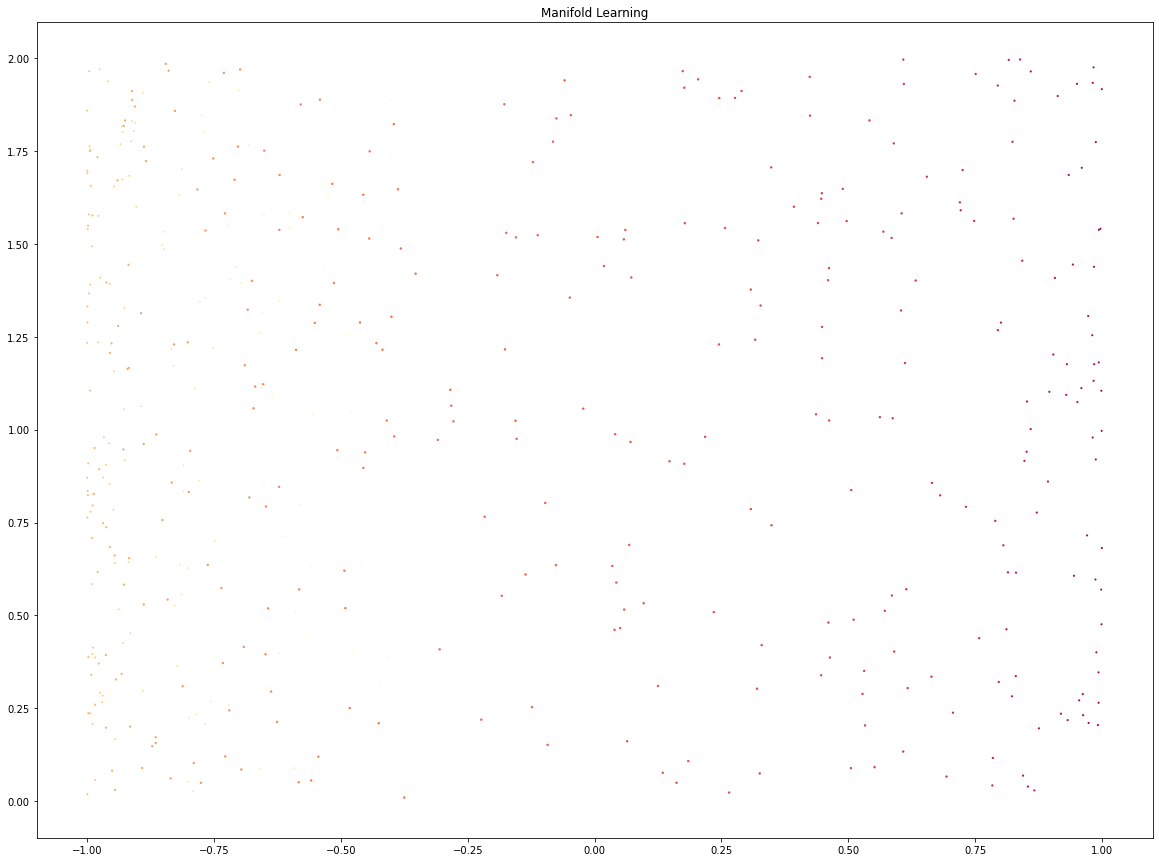

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import manifold, datasets
from sklearn import datasets
from sklearn.datasets import make_s_curve
#from sklearn.datasets import make_blobs


n_points = 1000
X, color = datasets.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(20, 15))
plt.title("Manifold Learning")

ax = fig.gca(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
#ax.view_init(4, -72)
plt.show()

In [15]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def stepwise_kpca(X, gamma, n_components):
    """
    Implementation of a RBF kernel PCA.

    Arguments:
        X: A MxN dataset as NumPy array where the samples are stored as rows (M),
           and the attributes defined as columns (N).
        gamma: A free parameter (coefficient) for the RBF kernel.
        n_components: The number of components to be returned.

    Returns the k eigenvectors (alphas) that correspond to the k largest
        eigenvalues (lambdas).

    """
    # Calculating the squared Euclidean distances for every pair of points
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Converting the pairwise distances into a symmetric MxM matrix.
    mat_sq_dists = squareform(sq_dists)

    # Computing the MxM kernel matrix.
    K = exp(-gamma * mat_sq_dists)

    # Centering the symmetric NxN kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K_norm = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenvalues in descending order with corresponding
    # eigenvectors from the symmetric matrix.
    eigvals, eigvecs = eigh(K_norm)

    # Obtaining the i eigenvectors (alphas) that corresponds to the i highest eigenvalues (lambdas).
    alphas = np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))
    lambdas = [eigvals[-i] for i in range(1,n_components+1)]

    return alphas, lambdas

<ipython-input-15-2a44770c701d>:28: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  K = exp(-gamma * mat_sq_dists)
<ipython-input-15-2a44770c701d>:40: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  alphas = np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))


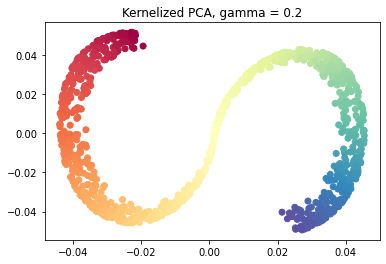

In [16]:
Y = stepwise_kpca(X, gamma=0.2, n_components=2)[0]
plt.title('Kernelized PCA, gamma = 0.2')
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral);
plt.show()

<ipython-input-15-2a44770c701d>:28: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  K = exp(-gamma * mat_sq_dists)
<ipython-input-15-2a44770c701d>:40: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  alphas = np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))


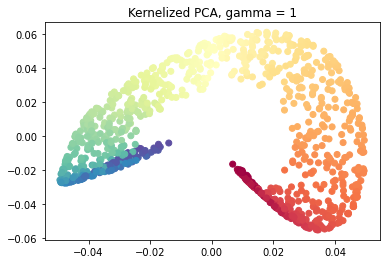

In [17]:
Y = stepwise_kpca(X, gamma=1, n_components=2)[0]
plt.title('Kernelized PCA, gamma = 1')
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral);
plt.show()

<ipython-input-15-2a44770c701d>:28: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  K = exp(-gamma * mat_sq_dists)
<ipython-input-15-2a44770c701d>:40: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  alphas = np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))


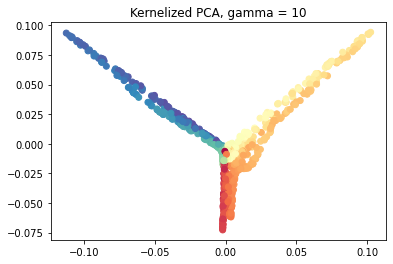

In [19]:
Y = stepwise_kpca(X, gamma=10, n_components=2)[0]
plt.title('Kernelized PCA, gamma = 10')
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral);
plt.show()

C:\Users\Mathe\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=10, n_components=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


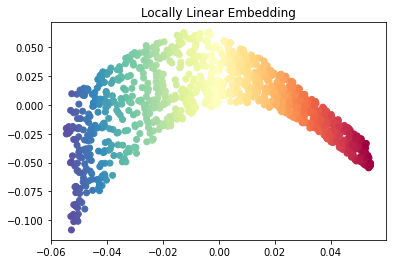

In [20]:
Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                    eigen_solver='auto',
                                    method='standard').fit_transform(X)
plt.title('Locally Linear Embedding')
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral);

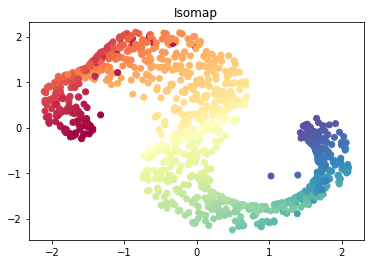

In [21]:
Y = manifold.MDS(n_components, max_iter=100, n_init=1).fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap");

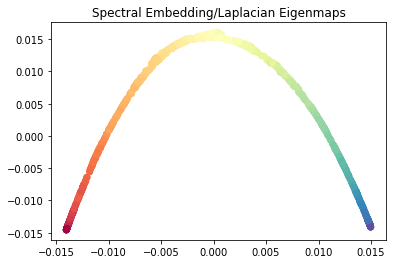

In [22]:
Y = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors).fit_transform(X)

plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Spectral Embedding/Laplacian Eigenmaps");

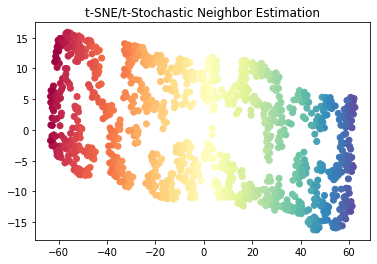

In [23]:
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE/t-Stochastic Neighbor Estimation");

## Simple 1D Regression (using Least-Squares)

In this section we use the Advertising data from Hastie/Tibshirani book <a href="http://www-bcf.usc.edu/~gareth/ISL/data.html">An Introduction to Statistical Learning</a>.

In [25]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

np.random.seed(47)

# If you are NOT using google colab, you need to take this part out starting from here
#from google.colab import files

#uploaded=files.upload()
# till here

advertising = pd.read_csv('Advertising.csv',usecols=(1,2,3,4))

X = np.array(advertising['TV']).reshape(-1,1)
y = np.array(advertising['Sales'])

advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


C:\Users\Mathe\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


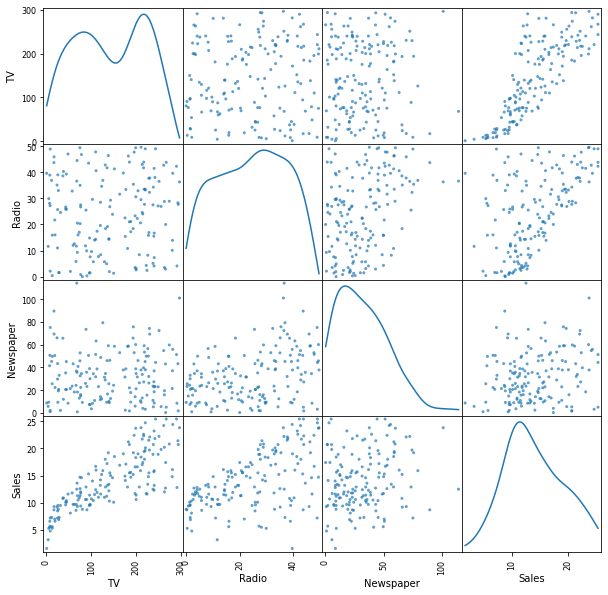

In [26]:
from pandas.plotting import scatter_matrix
scatter_matrix(advertising.iloc[:160], alpha=0.7, figsize=(10, 10), diagonal='kde');

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5)

In [28]:
from sklearn.linear_model import LinearRegression
%time regr = LinearRegression().fit(X_train,y_train)

Wall time: 9.32 ms


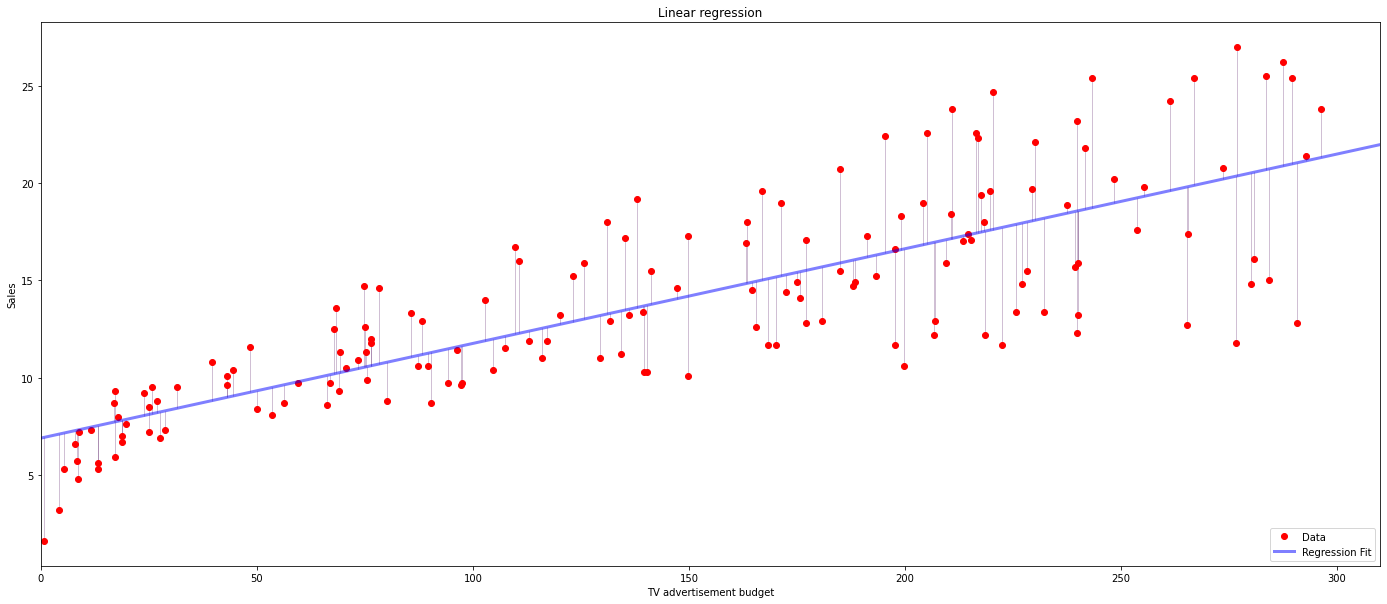

In [29]:
from matplotlib.collections import LineCollection

y_predicted = regr.predict(X_train)
N = len(y_train)

segments = [[[X_train[i], y_train[i]], [X_train[i], y_predicted[i]]] for i in range(N)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y_train)))
lc.set_alpha(0.5)
lc.set_linewidths(0.5 * np.ones(len(y_train)))

fig = plt.figure(figsize=[24,10])
# plot the training data
plt.plot(X_train, y_train, 'r.', markersize=12)
# plot the prediction line
x_lin = np.linspace(0,320,1000).reshape(-1,1)
plt.plot(x_lin, regr.predict(x_lin), color='blue',linewidth=3,alpha=0.5)
# plot the redisuals
plt.gca().add_collection(lc)

plt.xlim([0,310])
plt.xlabel('TV advertisement budget')
plt.ylabel('Sales')
plt.legend(('Data', 'Regression Fit'), loc='lower right')
plt.title('Linear regression')

# plot the regression line
plt.show()

In [30]:
# The mean square error
print("Residual sum of squares:", (np.mean((regr.predict(X_test) - y_test) ** 2)))
# Explained variance score: 1 is perfect prediction
print("Variance score:", regr.score(X_test, y_test))

Residual sum of squares: 12.57962963003675
Variance score: 0.4990784791512455


# 2D polynomial regression using least-squares

In [31]:
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

X = np.array(advertising[['TV','Radio']])
y = np.array(advertising['Sales'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=9)

# pipeline with polynomial regression
regr = Pipeline([('poly', PolynomialFeatures(degree=1)),
                  ('linear', LinearRegression(fit_intercept=True))])

%time regr = regr.fit(X_train,y_train)
y_predicted = regr.predict(X_train)

Wall time: 2.05 ms


<ipython-input-32-9fe8b7890a37>:21: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


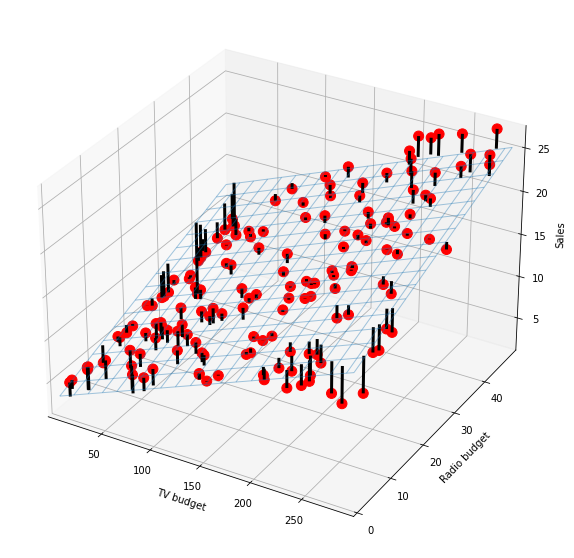

In [32]:
# create 3d line segments for residuals
segments_a = np.concatenate((X_train,y_train.reshape(-1,1)),axis=1)
segments_b = np.concatenate((X_train,y_predicted.reshape(-1,1)),axis=1)

segments = np.array([])
for i in range(len(segments_a)):
    segments = np.append(segments,np.array([segments_a[i],segments_b[i]]))
segments = np.vsplit(segments.reshape(segments_a.shape[0]*2,segments_a.shape[1])
                     ,len(segments_a))

# create a 3D meshgrid
X1, X2 = np.mgrid[X_train[:,0].min():X_train[:,0].max():1, 
                  X_train[:,0].min():X_train[:,1].max():1]
pos = np.empty(X1.shape + (2,))
pos[:, :, 0] = X1; pos[:, :, 1] = X2

Z = regr.predict(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)

fig = plt.figure(figsize=[24,10])
ax = fig.gca(projection='3d')

# plot the regression plane
ax.plot_wireframe(X1, X2, Z, rstride=15, cstride=3, alpha=0.4, linewidth=1)
# plot the points
ax.scatter(X_train[:,0],X_train[:,1],y_train,c='r',s=100,alpha=1,zorder=10000)

# Create the 3D-line collection object
lc = Line3DCollection(segments)
lc.set_color('k')
lc.set_linewidth(3)
ax.add_collection3d(lc)

ax.set_xlabel('TV budget'); ax.set_xlim(X_train[:,0].min(), X_train[:,0].max())
ax.set_ylabel('Radio budget'); ax.set_ylim(X_train[:,1].min(), X_train[:,1].max())
ax.set_zlabel('Sales');  ax.set_zlim(y_train.min(), y_train.max())

plt.show()

In [33]:
# The mean square error
print("Residual sum of squares:",np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print("Variance score:", regr.score(X_test, y_test))

Residual sum of squares: 1.8296065752684298
Variance score: 0.9258743223517101


## Parametric Classification Revisited

In the following plot, we see two bivariate Gaussian distribtuions from the homework last week.

<ipython-input-34-0a47cc6f28ba>:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


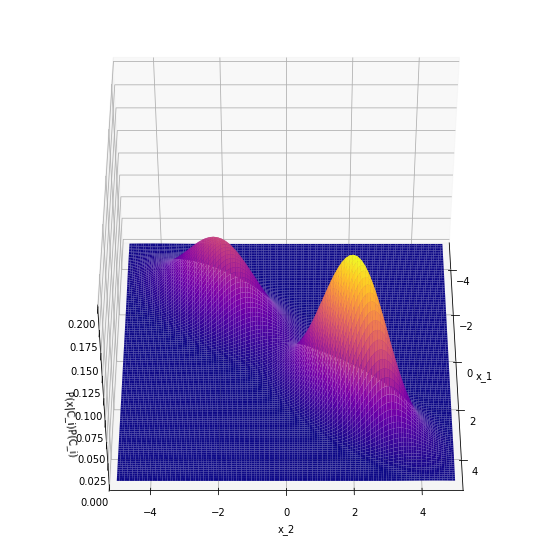

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from scipy.stats import multivariate_normal

fig = plt.figure(figsize=[24,10])
ax = fig.gca(projection='3d')

X1, X2 = np.mgrid[-5:5:0.075, -5:5:0.075]
pos = np.empty(X1.shape + (2,))
pos[:, :, 0] = X1; pos[:, :, 1] = X2

Z1 = multivariate_normal([-2, -2], [[0.9, 0.7], [0.7, 1.2]]).pdf(pos)*0.4
Z2 = multivariate_normal([2, 2], [[0.75, 0.6], [0.6, 0.9]]).pdf(pos)*0.6

Z = Z1+Z2
ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, alpha=1, cmap=plt.cm.plasma, antialiased=True)

ax.set_xlabel('x_1'); ax.set_xlim(-5, 5)
ax.set_ylabel('x_2'); ax.set_ylim(-5, 5)
ax.set_zlabel('P(x|C_i)P(C_i)');  ax.set_zlim(0, 0.2)

ax.view_init(45, 0)

plt.show()

Then we see a quadratic discriminant is formed when we use the entire covariance matrices for each class.

<ipython-input-35-0259867f729f>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


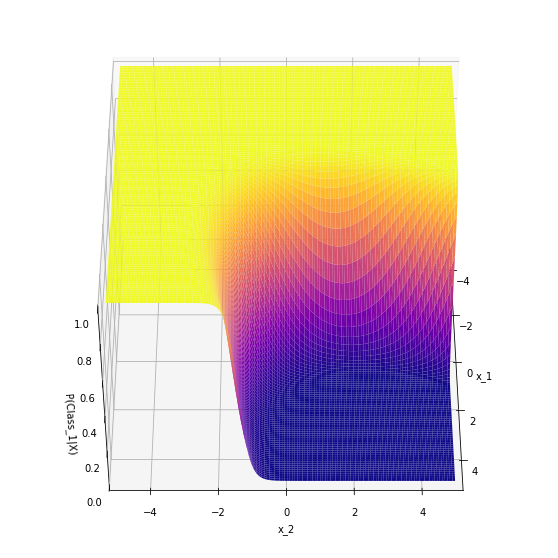

In [35]:
fig = plt.figure(figsize=[24,10])
ax = fig.gca(projection='3d')

Z1 = multivariate_normal([-2, -2], [[0.9, 0.7], [0.7, 1.2]]).pdf(pos)*0.4
Z2 = multivariate_normal([2, 2], [[0.75, 0.6], [0.6, 0.9]]).pdf(pos)*0.6

Z = Z1/(Z1+Z2)

ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, alpha=1, cmap=plt.cm.plasma)

ax.set_xlabel('x_1'); ax.set_xlim(-5, 5)
ax.set_ylabel('x_2'); ax.set_ylim(-5, 5)
ax.set_zlabel('P(Class_1|X)');  ax.set_zlim(0, 1)

ax.view_init(45, 0)

plt.show()

Then we see a linear discriminant is formed when we weight the covariance matrices by the prior probabilities and add them together.

<ipython-input-36-c71bb7345802>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


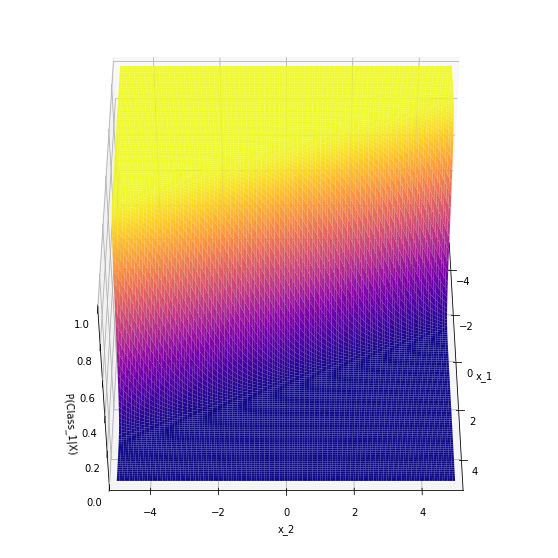

In [36]:
fig = plt.figure(figsize=[24,10])
ax = fig.gca(projection='3d')

Z1 = multivariate_normal([-2, -2], [[0.81, 0.64], [0.64, 1.02]]).pdf(pos)*0.4
Z2 = multivariate_normal([2, 2], [[0.81, 0.64], [0.64, 1.02]]).pdf(pos)*0.6

Z = Z1/(Z1+Z2)

ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, alpha=1, cmap=plt.cm.plasma, antialiased=True)

ax.set_xlabel('x_1'); ax.set_xlim(-5, 5)
ax.set_ylabel('x_2'); ax.set_ylim(-5, 5)
ax.set_zlabel('P(Class_1|X)');  ax.set_zlim(0, 1)

ax.view_init(45, 0)

plt.show()

In the Naive case, we also get a discrminant with a curve, but we do not estimate the covariance between the dimensions.

<ipython-input-37-02e782903305>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


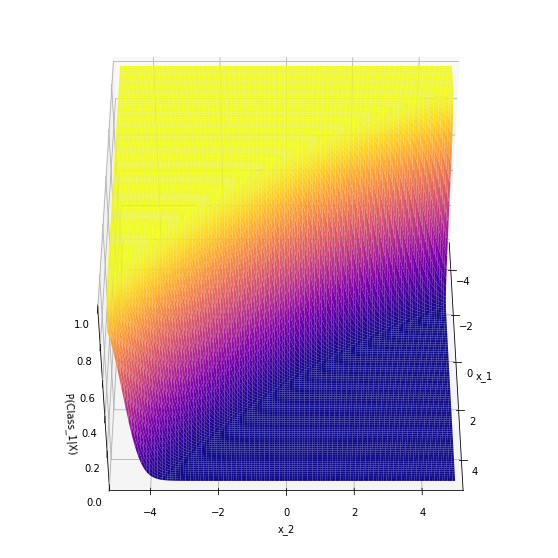

In [37]:
fig = plt.figure(figsize=[24,10])
ax = fig.gca(projection='3d')

Z1 = multivariate_normal([-2, -2], [[0.9, 0], [0, 1.2]]).pdf(pos)*0.4
Z2 = multivariate_normal([2, 2], [[0.75, 0], [0, 0.9]]).pdf(pos)*0.6

Z = Z1/(Z1+Z2)

ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, alpha=1, cmap=plt.cm.plasma, antialiased=True)

ax.set_xlabel('x_1'); ax.set_xlim(-5, 5)
ax.set_ylabel('x_2'); ax.set_ylim(-5, 5)
ax.set_zlabel('P(Class_1|X)');  ax.set_zlim(0, 1)

ax.view_init(45, 0)

plt.show()

## Logistic Regression

For multiclass logistic regression, Sci-kit learn uses a one vs. rest approach.

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# Take this out if you are NOT using google colab. From here:
#from google.colab import files

#src = list(files.upload().values())[0]

#open('mlclass.py','wb').write(src)

#import mlclass2


# to here

from mlclass2 import simplemetrics, plot_decision_2d_lda
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import axes3d

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
X = np.array(df[[0,1,2,3]])

class_le = LabelEncoder()
y = class_le.fit_transform(df[4].values)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=50)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_pca = pca.transform(X)

stdscaler = preprocessing.StandardScaler().fit(X_train_pca)
X_scaled  = stdscaler.transform(X_pca)
X_train_scaled = stdscaler.transform(X_train_pca)
X_test_scaled  = stdscaler.transform(X_test_pca)

from sklearn.linear_model import LogisticRegression
# regular
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
predicted = lr.predict(X_test_scaled)

Then we plot the decision boundaries:

<ipython-input-40-de1dab437518>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.brg)


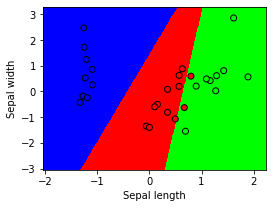

In [40]:
h = 0.01
x_min, x_max = X_train_scaled[:, 0].min() - .5, X_train_scaled[:, 0].max() + .5
y_min, y_max = X_train_scaled[:, 1].min() - .5, X_train_scaled[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.brg)

# Plot also the training points
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.brg)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In 3d, we can get a good sense of the probabilities as well. Here I am only showing the surface formed by the max probabilities of the classes.

<ipython-input-41-566c68320fac>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


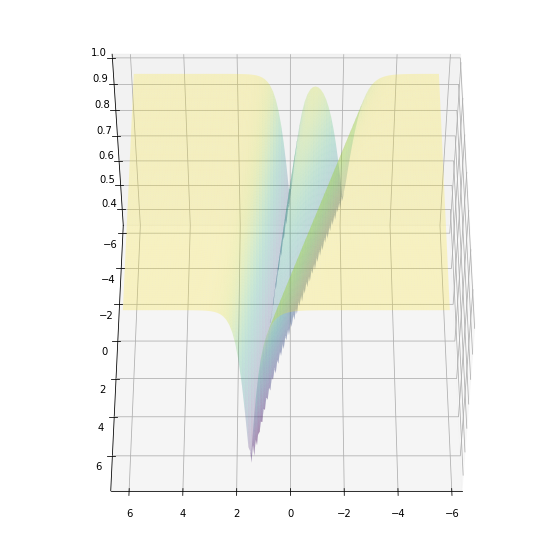

In [41]:
fig = plt.figure(figsize=[24,10])
ax = fig.gca(projection='3d')

X1, X2 = np.mgrid[X_scaled[:,0].min()-4:X_scaled[:,0].max()+4:0.1, X_scaled[:,0].min()-4:X_scaled[:,1].max()+4:0.1]
pos = np.empty(X1.shape + (2,))
pos[:, :, 0] = X1; pos[:, :, 1] = X2

Z = lr.predict_proba(np.c_[X1.ravel(), X2.ravel()])
Z_0 = Z[:,0].reshape(X1.shape)
Z_1 = Z[:,1].reshape(X1.shape)
Z_2 = Z[:,2].reshape(X1.shape)

Z = np.maximum(Z_0,Z_1)
Z = np.maximum(Z,Z_2)

ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, alpha=0.25, cmap=plt.cm.viridis, antialiased=True)

ax.view_init(50, 90)

plt.show()

## Softmax Regression

In [42]:
# softmax regression
lr = LogisticRegression(multi_class='multinomial',solver='lbfgs')
lr.fit(X_train_scaled, y_train)
predicted = lr.predict(X_test_scaled)

<ipython-input-43-6fcc2b50d921>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


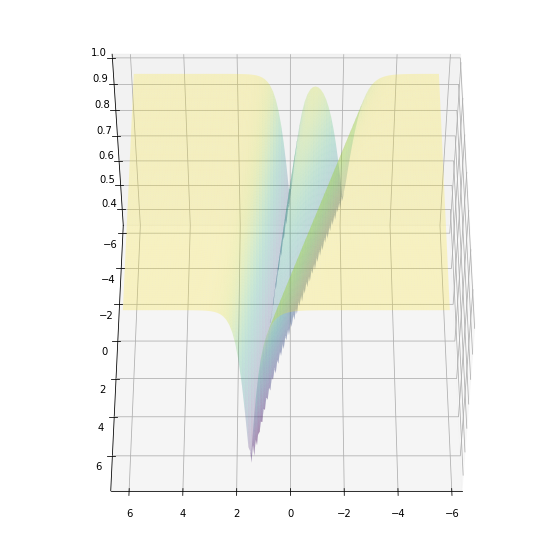

In [43]:
fig = plt.figure(figsize=[24,10])
ax = fig.gca(projection='3d')

X1, X2 = np.mgrid[X_scaled[:,0].min()-4:X_scaled[:,0].max()+4:0.1, X_scaled[:,0].min()-4:X_scaled[:,1].max()+4:0.1]
pos = np.empty(X1.shape + (2,))
pos[:, :, 0] = X1; pos[:, :, 1] = X2

Z = lr.predict_proba(np.c_[X1.ravel(), X2.ravel()])
Z_0 = Z[:,0].reshape(X1.shape)
Z_1 = Z[:,1].reshape(X1.shape)

Z = np.maximum(Z_0,Z_1)
Z = np.maximum(Z,Z_2)

ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, alpha=0.25, cmap=plt.cm.viridis, antialiased=True)

ax.view_init(50, 90)

plt.show()

## Introduction to Keras

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
X = df.iloc[0:100, [0,1,2,3]].values
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

##### In Keras, all Pandas DataFrames must be converted to Numpy Arrays.  ####

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=50)

stdscaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled  = stdscaler.transform(X_test)

In [45]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD

# Stochastic Logistic Regression
model = Sequential()

# validation loss 
model.add(Dense(units=1, input_shape=[X_train_scaled.shape[1]],activation='sigmoid', kernel_regularizer=l1(0.01)))

# Compile model
sgd = SGD(learning_rate=0.1)
model.compile(loss='mean_squared_error', optimizer=sgd)

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Fit the model
history = model.fit(X_train_scaled, y_train, batch_size = 256,
          epochs = 200, verbose=0, validation_data=(X_test_scaled,y_test))

Loss after final iteration:  0.03971053659915924


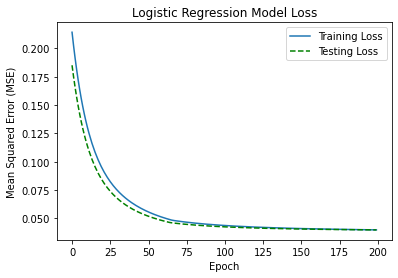

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Logistic Regression Model Loss')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print("Loss after final iteration: ", history.history['val_loss'][-1])
plt.show()

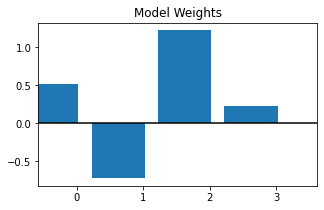

In [49]:
fig = plt.figure(figsize=(5,3))
ax = fig.gca()
plt.plot([-0.2,4],[0,0],color='k')
plt.xlim([-0.2,4])
plt.title('Model Weights')
ax.set_xticks([0.375,1.375,2.375,3.375])
ax.set_xticklabels([0,1,2,3])
Temp=model.get_weights()[0].T
plt.bar(range(len(Temp[0])),Temp[0]);

## <span style="color:red">Programming Assignment 4: Logistic Regression on the notMIST dataset</span>

For this assignment, we will perform logistic regression on the notMIST dataset using Keras. I have included the code to import the dataset and display the images. Since these images are black and white matrices, we flatten them to a vector so they can be used with logistic regression. I also include the code to do the training and testing split.

Create a logistic regression model using Keras. In the first and only layer, set the only layer to:

<code>model.add(Dense(output_dim=10, input_shape=[784], 
                activation='sigmoid', W_regularizer=l2(0.01)))</code>

Train the model for 100 iterations (<code>nb_epoch</code>). Change the loss function to <code>'categorical_crossentropy'</code>. 

Display the loss after the final iteration and plot the training and testing loss, as above. Be sure to change the loss function label on the plot.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.io import loadmat

# If you are NOT using google colab, you need to take this part out starting from here
#from google.colab import files

#uploaded=files.upload()
# till here

data = loadmat('notMNIST_small.mat')
X_temp = data['images']/255

#for i in range(X_temp.shape[2]):
    
X = np.empty(shape=[X_temp.shape[2]] + [784], dtype='float32')
for i in range(X_temp.shape[2]):
    X[i,:] = X_temp[:,:,i].flatten()

y = pd.get_dummies(data['labels']).to_numpy()

print(X_temp.shape)
print(X.shape)
print(y.shape)
X[1,:]

(28, 28, 18724)
(18724, 784)
(18724, 10)


array([0.        , 0.00392157, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03137255, 0.16078432, 0.38039216, 0.6509804 , 0.87058824,
       0.9764706 , 0.90588236, 0.6627451 , 0.4       , 0.11764706,
       0.        , 0.00784314, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.07450981,
       0.3647059 , 0.44313726, 0.42745098, 0.4627451 , 0.5019608 ,
       0.54509807, 0.6392157 , 0.77254903, 0.8627451 , 0.9607843 ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99607843, 1.        , 0.94509804, 0.42352942, 0.        ,
       0.00392157, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01176471, 0.654902  , 1.        , 0.9843137 ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99607843, 0.98039216, 0.972549  ,
       0.99215686, 1.        , 0.99607843, 0.9882353 , 0.99215

(28, 28)


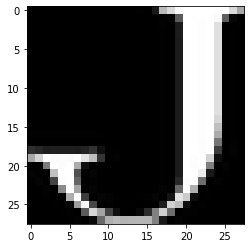

In [51]:
print(X_temp[:,:,3].shape)
plt.imshow(X_temp[:,:,3],cmap="gray");

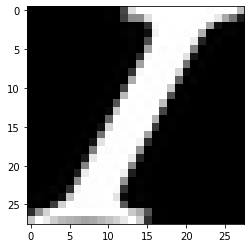

In [52]:
plt.imshow(X_temp[:,:,4504],cmap="gray");

In [67]:
X_train, X_test, y_train, y_test =train_test_split(
    X, y, test_size=0.2, random_state=50)
print(X_train.shape)
print(y_train.shape)
stdscaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled  = stdscaler.transform(X_test)

(14979, 784)
(14979, 10)


In [46]:
# Implement your code here

In [81]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD

# Stochastic Logistic Regression
model = Sequential()

# validation loss 
#model.add(Dense(units=1, input_shape=[X_train_scaled.shape[1]],activation='sigmoid', kernel_regularizer=l1(0.01)))
model.add(Dense(units=10, input_shape=[784], activation='sigmoid', kernel_regularizer=l2(0.01)))

# Compile model
sgd = SGD(learning_rate=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

In [82]:
# Fit the model
history = model.fit(X_train_scaled, y_train, batch_size = 256,
          epochs = 100, verbose=0, validation_data=(X_test_scaled,y_test))

Loss after final iteration:  0.46804317831993103


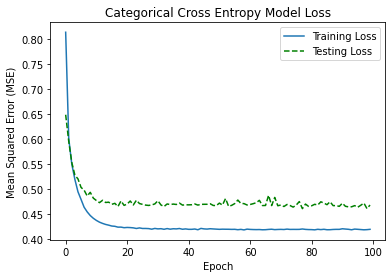

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Categorical Cross Entropy Model Loss')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print("Loss after final iteration: ", history.history['val_loss'][-1])
plt.show()